# Ensemble Learning with Traditional ML Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score
import optuna
import os

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/3887039854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = "data/Regular_Processed/With_Ordinal_Encoding/Pos_and_Neg"
X_train = np.load(os.path.join(DATA_DIR, "X_train.npy"))
X_valid = np.load(os.path.join(DATA_DIR, "X_valid.npy"))
y_train = np.load(os.path.join(DATA_DIR, "y_train.npy"))
y_valid = np.load(os.path.join(DATA_DIR, "y_valid.npy"))
X_test = np.load(os.path.join(DATA_DIR, "X_test.npy"))

for arr in [X_train, X_valid, y_train, y_valid, X_test]:
    print(arr.shape)

(988, 35)
(247, 35)
(988,)
(247,)
(824, 35)


# Loading Traditional ML Models

### Random Forest

In [3]:
# Lazy Predict's Random Forest Classifier values
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=23, random_state=123, criterion='entropy', n_estimators=28)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.9979757085020243
Valid F1 Score: 0.7125506072874493


In [6]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy', 'log_loss'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 5, log=True)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 2, 15, log=True)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=123, criterion=rf_criterion)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score  # - abs((train_f1_score - valid_f1_score)/7)

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-19 15:24:39,118] A new study created in memory with name: no-name-04babb05-d839-4491-a81a-dc60e02ba583
[I 2024-04-19 15:24:39,128] Trial 0 finished with value: 0.680161943319838 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 5, 'rf_n_estimators': 3}. Best is trial 0 with value: 0.680161943319838.
[I 2024-04-19 15:24:39,135] Trial 1 finished with value: 0.582995951417004 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 2, 'rf_n_estimators': 4}. Best is trial 0 with value: 0.680161943319838.
[I 2024-04-19 15:24:39,142] Trial 2 finished with value: 0.6437246963562753 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 4, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.680161943319838.
[I 2024-04-19 15:24:39,156] Trial 3 finished with value: 0.6558704453441295 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 2, 'rf_n_estimators': 15}. Best is trial 0 with value: 0.680161943319838.
[I 2024-04-19 15:24:39,160] Trial 4 finished wit

In [7]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.7165991902834008]
HyperParameters = {'rf_criterion': 'gini', 'rf_max_depth': 5, 'rf_n_estimators': 7}


In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=123, criterion='gini', n_estimators=7)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7358299595141701
Valid F1 Score: 0.7165991902834008


### Bernoulli Naive Bayes

In [9]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
train_preds = naive_bayes_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = naive_bayes_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.667004048582996
Valid F1 Score: 0.6761133603238867


### Nearest Centroid

In [13]:
from sklearn.neighbors import NearestCentroid

nearest_centroid_classifier = NearestCentroid(metric='braycurtis')
nearest_centroid_classifier.fit(X_train, y_train)
train_preds = nearest_centroid_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = nearest_centroid_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6346153846153846
Valid F1 Score: 0.659919028340081


/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


In [11]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_metric = trial.suggest_categorical('rf_metric', ['hamming', 'cosine', 'euclidean', 'yule', 'russellrao', 'jaccard', 'chebyshev',
                                                        'sokalmichener', 'sqeuclidean', 'matching', 'rogerstanimoto', 'nan_euclidean',
                                                        'dice', 'sokalsneath', 'correlation', 'canberra', 'manhattan', 'braycurtis'])
    classifier_obj = NearestCentroid(metric=rf_metric)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-19 15:25:42,340] A new study created in memory with name: no-name-f5f87173-d29d-45cb-bc76-a8d31d4b796a
[I 2024-04-19 15:25:42,349] Trial 0 finished with value: 0.6477732793522267 and parameters: {'rf_metric': 'manhattan'}. Best is trial 0 with value: 0.6477732793522267.
[I 2024-04-19 15:25:42,354] Trial 1 finished with value: 0.6558704453441295 and parameters: {'rf_metric': 'euclidean'}. Best is trial 1 with value: 0.6558704453441295.
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be th

In [12]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.659919028340081]
HyperParameters = {'rf_metric': 'braycurtis'}


## XGBoost

In [184]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.9969635627530364
Valid F1 Score: 0.7004048582995951


In [22]:
import xgboost as xgb
from sklearn.model_selection import KFold
import optuna

def objective(trial):
    # Define XGBoost parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 20),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.5)
    }
    
    # Create XGBoost classifier instance with the specified parameters
    bst = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=123, **params)
    bst.fit(X_train, y_train)
    valid_preds = bst.predict(X_valid)
    f1_scores = f1_score(y_valid, valid_preds, average='micro')
    
    return f1_scores

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')


[I 2024-04-19 15:54:57,405] A new study created in memory with name: no-name-68f8a34a-80da-4c0f-aec9-14f41bd7000c
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/631513262.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.5)
[I 2024-04-19 15:54:57,472] Trial 0 finished with value: 0.7004048582995951 and parameters: {'n_estimators': 12, 'max_depth': 6, 'learning_rate': 0.0012859806551399156}. Best is trial 0 with value: 0.7004048582995951.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/631513262.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': tria

Best Trial - F1 Score: 0.7490
Best Hyperparameters: {'n_estimators': 16, 'max_depth': 5, 'learning_rate': 0.1298131279490343}


In [23]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=16, max_depth=5, learning_rate=0.1298131279490343, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.8279352226720648
Valid F1 Score: 0.7489878542510121


## LightGBM

In [24]:
import lightgbm as lgb
from sklearn.metrics import f1_score

# Create LightGBM classifier instance
lgb_classifier = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='multiclass',  # Use 'multiclass' for multi-class classification
    num_class=3,
    random_state=123
)

# Train the LightGBM model
lgb_classifier.fit(X_train, y_train)

# Make predictions on training and validation data
train_preds = lgb_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = lgb_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [25]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import optuna

def objective(trial):
    # Define LightGBM parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 20, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 7, log=True),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }
    
    # Create LightGBM classifier instance with the specified parameters
    lgb_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=123, **params)
    lgb_classifier.fit(X_train, y_train)
    valid_preds = lgb_classifier.predict(X_valid)
    f1_scores = f1_score(y_valid, valid_preds, average='micro')
    
    return f1_scores

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')

[I 2024-04-19 15:57:14,707] A new study created in memory with name: no-name-6f289775-84f4-4a11-a2b7-d88678146c0f
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:14,761] Trial 0 finished with value: 0.7206477732793523 and parameters: {'n_estimators': 14, 'max_depth': 3, 'learning_rate': 0.10834191388317857}. Best is trial 0 with value: 0.7206477732793523.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.s

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-04-19 15:57:14,924] Trial 9 finished with value: 0.7246963562753036 and parameters: {'n_estimators': 17, 'max_depth': 5, 'learning_rate': 0.31057280460305786}. Best is trial 9 with value: 0.7246963562753036.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:14,981] Trial 10 finished with value: 0.757085020242915 and parameters: {'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.4964688172205006}. Best is trial 10 with value: 0.757085020242915.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/op

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the trai

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,141] Trial 13 finished with value: 0.4493927125506073 and parameters: {'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.012540138426683197}. Best is trial 10 with value: 0.757085020242915.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,203] Trial 14 finished with value: 0.7165991

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-19 15:57:15,341] Trial 19 finished with value: 0.5141700404858299 and parameters: {'n_estimators': 3, 'max_depth': 6, 'learning_rate': 0.07601011177495665}. Best is trial 10 with value: 0.757085020242915.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,368] Trial 20 finished with value: 0.7044534412955465 and parameters: {'n_estimators': 2, 'max_depth': 6, 'learning_rate': 0.31938539783402187}. Best is trial 10 with value: 0.757085020242915.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explici

[I 2024-04-19 15:57:15,546] Trial 23 finished with value: 0.7530364372469636 and parameters: {'n_estimators': 11, 'max_depth': 6, 'learning_rate': 0.21160161929111762}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,611] Trial 24 finished with value: 0.7368421052631579 and parameters: {'n_estimators': 13, 'max_depth': 5, 'learning_rate': 0.14132768576120702}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:15,731] Trial 26 finished with value: 0.7489878542510121 and parameters: {'n_estimators': 12, 'max_depth': 6, 'learning_rate': 0.16952763960865086}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,813] Trial 27 finished with value: 0.7125506072874493 and parameters: {'n_estimators': 16, 'max_depth': 5, 'learning_rate': 0.07077976533333258}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:15,969] Trial 30 finished with value: 0.7368421052631579 and parameters: {'n_estimators': 14, 'max_depth': 4, 'learning_rate': 0.2556382740321983}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,006] Trial 31 finished with value: 0.7246963

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:16,176] Trial 34 finished with value: 0.6720647773279352 and parameters: {'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.0949402767727145}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,323] Trial 35 finished with value: 0.7530364372469636 and parameters: {'n_estimators': 20, 'max_depth': 7, 'learning_rate': 0.15151096808006292}. Best is trial 22 with value: 0.7732793522267206.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,457] Trial 36 finished with value: 0.7408906882591093 and parameters: {'n_estimators': 19, 'max_depth': 7, 'learning_rate': 0.13273351301469252}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:16,570] Trial 37 finished with value: 0.7611336032388664 and parameters: {'n_estimators': 15, 'max_depth': 7, 'learning_rate': 0.18188784381829262}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,608] Trial 38 finished with value: 0.7165991902834008 and parameters: {'n_estimators': 15, 'max_depth': 3, 'learning_rate': 0.18902029752159552}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you 

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,771] Trial 40 finished with value: 0.7449392712550608 and parameters: {'n_estimators': 8, 'max_depth': 6, 'learning_rate': 0.19575994824395923}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:16,893] Trial 41 finished with value: 0.7449392

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:16,996] Trial 42 finished with value: 0.7449392712550608 and parameters: {'n_estimators': 14, 'max_depth': 7, 'learning_rate': 0.2748944960792128}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:17,073] Trial 43 finished with value: 0.6923076923076923 and parameters: {'n_estimators': 11, 'max_depth': 6, 'learning_rate': 0.05788937326720836}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:17,226] Trial 44 finished with value: 0.7165991902834008 and parameters: {'n_estimators': 20, 'max_depth': 7, 'learning_rate': 0.03830615951835099}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:17,306] Trial 45 finished with value: 0.728744939271255 and parameters: {'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.11651516006367121}. Best is trial 22 with value: 0.7732793522267206.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:17,390] Trial 46 finished with value: 0.7246963562753036 and parameters: {'n_estimators': 16, 'max_depth': 5, 'learning_rate': 0.16021098982981788}. Best is trial 22 with value: 0.7732793522267206.
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/447892393.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-19 15:57:17,440] Trial 47 finished with value: 0.740890

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 15:57:17,572] Trial 49 finished with value: 0.757085020242915 and parameters: {'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.28317273205942156}. Best is trial 22 with value: 0.7732793522267206.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

In [26]:
import lightgbm as lgb
from sklearn.metrics import f1_score

# Create LightGBM classifier instance
lgb_classifier = lgb.LGBMClassifier(
    n_estimators=9,
    max_depth=6,
    learning_rate=0.23292364216451264,
    objective='multiclass',  # Use 'multiclass' for multi-class classification
    num_class=3,
    random_state=123
)

# Train the LightGBM model
lgb_classifier.fit(X_train, y_train)

# Make predictions on training and validation data
train_preds = lgb_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = lgb_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

## HistGradientBoostingClassifier

In [34]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_iter': trial.suggest_int('max_iter', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'l2_regularization': trial.suggest_loguniform('l2_regularization', 1e-6, 1e-3)
    }
    
    # Create HistGradientBoostingClassifier instance with the suggested hyperparameters
    clf = HistGradientBoostingClassifier(**params, random_state=123)    
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    f1_scores = f1_score(y_valid, valid_preds, average='micro')
    
    return f1_scores

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')

[I 2024-04-19 16:04:52,967] A new study created in memory with name: no-name-d9e95042-68a5-4bf3-afd6-7ae7cf41c341
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/2740757773.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_4643/2740757773.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_regularization': trial.suggest_loguniform('l2_regularization', 1e-6, 1e-3)
[I 2024-04-19 16:04:54,578] Trial 0 finished with value: 0.7246963562753036 and parameters: {'learning_rate': 0.020048394292593242, 'max_iter': 159, 'max_depth

Best Trial - F1 Score: 0.7611
Best Hyperparameters: {'learning_rate': 0.02312436044836335, 'max_iter': 249, 'max_depth': 4, 'min_samples_leaf': 10, 'l2_regularization': 2.1193472113369375e-06}


In [28]:
# Best Hyperparameters: {'learning_rate': 0.07160538769582898, 'max_iter': 169, 'max_depth': 4, 'min_samples_leaf': 12, 'l2_regularization': 1.617937162630144e-05}
best_params = {
    'learning_rate': study.best_params['learning_rate'],
    'max_iter': study.best_params['max_iter'],
    'max_depth': study.best_params['max_depth'],
    'min_samples_leaf': study.best_params['min_samples_leaf'],
    'l2_regularization': study.best_params['l2_regularization'],
    'random_state': 123
}

# Create and train the HistGradientBoostingClassifier with the best hyperparameters
best_clf = HistGradientBoostingClassifier(**best_params)
best_clf.fit(X_train, y_train)

train_preds = best_clf.predict(X_train)
train_f1_score = f1_score(y_train, train_preds, average='micro')
print(f"Training F1 Score: {train_f1_score:.4f}")

# Predictions and F1 score on validation set
valid_preds = best_clf.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_preds, average='micro')
print(f"Validation F1 Score: {valid_f1_score:.4f}")

Training F1 Score: 0.9909
Validation F1 Score: 0.7571


# Ensemble Learning

In [37]:
estimator_dict = {
    'random_forest': random_forest_classifier,
    'nearest_centroid': nearest_centroid_classifier,
    'bernoulli_naive_bayes': naive_bayes_classifier,
    'XGBoost': bst,
    'lgbm': lgb_classifier,
    'histgb': best_clf,
}
estimators = list(estimator_dict.items())

### Analysis of Models

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


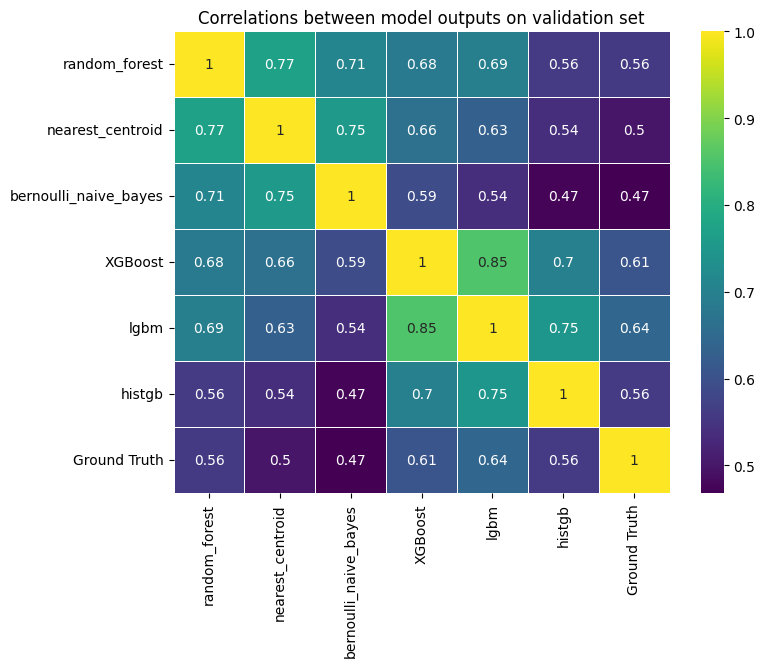

In [38]:
val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)
val_preds_df['Ground Truth'] = y_valid

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(val_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on validation set")
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


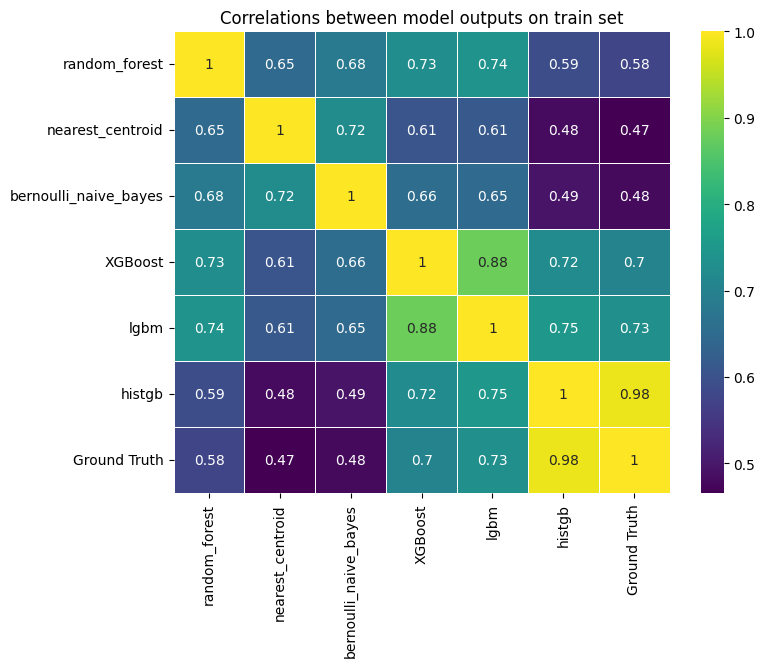

In [39]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)
train_preds_df['Ground Truth'] = y_train

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(train_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on train set")
plt.show()

### Voting Classifier

In [41]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=[3, 2, 1, 1, 1, 1])
voting_classifier.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

#### Optimising Voting Classifier Weights 

In [42]:
def objective(trial):
    # Define the range for each weight to optimize
    weights = [trial.suggest_float(f'weight_{i}', 0.1, 10.0) for i in range(len(estimators))]
    
    # Create the VotingClassifier with the suggested weights
    voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=weights)
    voting_classifier.fit(X_train, y_train)

    # Calculate F1 score on the validation set
    valid_preds = voting_classifier.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
    
    return valid_f1_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best weights found by Optuna
best_weights = study.best_params
print("Best Weights:", best_weights)

best_weights = [best_weights[f'weight_{i}'] for i in range(len(estimators))]

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=best_weights)
voting_classifier.fit(X_train, y_train)

# Evaluate the model on both training and validation sets
train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[I 2024-04-19 16:14:11,836] A new study created in memory with name: no-name-4bb29795-db43-4755-9a1d-adc3290e7c98
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-19 16:14:12,906] Trial 0 finished with value: 0.7611336032388664 and parameters: {'weight_0': 0.919682893527011, 'weight_1': 9.129097867067497, 'weight_2': 1.2054788021098117, 'weight_3': 2.7197030336135373, 'weight_4': 9.783389913706257, 'weight_5': 6.0514666656838765}. Best is trial 0 with value: 0.7611336032388664.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:13,955] Trial 1 finished with value: 0.7246963562753036 and parameters: {'weight_0': 5.342649375735381, 'weight_1': 9.425991822853106, 'weight_2': 1.571694728156692, 'weight_3': 4.852408455110255, 'weight_4': 8.606331329826485, 'weight_5': 2.1285529061784465}. Best is trial 0 with value: 0.7611336032388664.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:15,014] Trial 2 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.613970098318173, 'weight_1': 3.085859937050753, 'weight_2': 3.7498722407614347, 'weight_3': 0.12161090810532962, 'weight_4': 5.192494971733798, 'weight_5': 2.398160806924306}. Best is trial 0 with value: 0.7611336032388664.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:16,049] Trial 3 finished with value: 0.7165991902834008 and parameters: {'weight_0': 7.666705684144973, 'weight_1': 2.934580789974331, 'weight_2': 5.659391575591998, 'weight_3': 8.717163625065364, 'weight_4': 4.851613705745065, 'weight_5': 2.2904342245875293}. Best is trial 0 with value: 0.7611336032388664.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:17,097] Trial 4 finished with value: 0.7773279352226721 and parameters: {'weight_0': 0.6522557495175978, 'weight_1': 1.0483211957000045, 'weight_2': 2.395023188190919, 'weight_3': 4.699368934573595, 'weight_4': 9.205794446937775, 'weight_5': 3.0255471107258054}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:18,151] Trial 5 finished with value: 0.7651821862348178 and parameters: {'weight_0': 6.826155304121547, 'weight_1': 7.475827929231922, 'weight_2': 1.29307780232272, 'weight_3': 7.602578687596013, 'weight_4': 5.787380954596826, 'weight_5': 9.842093951387413}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:14:19,372] Trial 6 finished with value: 0.7489878542510121 and parameters: {'weight_0': 1.417400989950301, 'weight_1': 0.589768257952234, 'weight_2': 4.682486957749186, 'weight_3': 9.04015253145838, 'weight_4': 3.4369816032948517, 'weight_5': 7.725830411642517}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:20,344] Trial 7 finished with value: 0.7651821862348178 and parameters: {'weight_0': 7.06800048807921, 'weight_1': 0.9670241601986679, 'weight_2': 2.480663662139551, 'weight_3': 6.171460389473108, 'weight_4': 5.260651762066738, 'weight_5': 5.563056325168316}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-19 16:14:21,249] Trial 8 finished with value: 0.7611336032388664 and parameters: {'weight_0': 2.8740565664728637, 'weight_1': 6.989213589583739, 'weight_2': 4.64978886177318, 'weight_3': 4.054953328218116, 'weight_4': 2.2876954789585144, 'weight_5': 9.991482189843678}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:22,273] Trial 9 finished with value: 0.7004048582995951 and parameters: {'weight_0': 1.6696975511826455, 'weight_1': 7.662785242519631, 'weight_2': 9.25709788074013, 'weight_3': 5.001813151458244, 'weight_4': 4.601304925820651, 'weight_5': 2.4571817477255045}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:14:23,383] Trial 10 finished with value: 0.7165991902834008 and parameters: {'weight_0': 9.236178713882097, 'weight_1': 4.186205335935167, 'weight_2': 7.164714120703359, 'weight_3': 1.9519312510328999, 'weight_4': 0.3297571725237125, 'weight_5': 0.19963412322391072}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:24,429] Trial 11 finished with value: 0.7611336032388664 and parameters: {'weight_0': 4.562352152983973, 'weight_1': 6.061635797544444, 'weight_2': 0.17958293371077705, 'weight_3': 7.004477730054418, 'weight_4': 7.452061169608375, 'weight_5': 9.469192193590642}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:25,410] Trial 12 finished with value: 0.757085020242915 and parameters: {'weight_0': 6.617627558333497, 'weight_1': 5.154762016433393, 'weight_2': 2.7752802214165806, 'weight_3': 7.285203856457601, 'weight_4': 7.0025313736670896, 'weight_5': 3.964745729433866}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:26,366] Trial 13 finished with value: 0.7611336032388664 and parameters: {'weight_0': 9.9954825352692, 'weight_1': 1.935709602776989, 'weight_2': 0.4856909675640546, 'weight_3': 9.760079080872156, 'weight_4': 7.025979473864699, 'weight_5': 7.435259881160047}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:27,362] Trial 14 finished with value: 0.7611336032388664 and parameters: {'weight_0': 2.7145524223114292, 'weight_1': 7.787660868423086, 'weight_2': 2.3574459830085925, 'weight_3': 7.668984483677405, 'weight_4': 9.69010001602674, 'weight_5': 3.938400949131567}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:28,358] Trial 15 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.12964313837274366, 'weight_1': 4.79436280870539, 'weight_2': 3.277830755508735, 'weight_3': 5.988538751308036, 'weight_4': 8.146333329489277, 'weight_5': 0.11420524390828746}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:29,360] Trial 16 finished with value: 0.7246963562753036 and parameters: {'weight_0': 2.8444453631423317, 'weight_1': 4.056896011405803, 'weight_2': 6.290783077727834, 'weight_3': 3.1170057607919412, 'weight_4': 8.670275788114445, 'weight_5': 0.1677656940065102}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:30,396] Trial 17 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.14205387081047538, 'weight_1': 1.730515923585361, 'weight_2': 3.9063354991966275, 'weight_3': 5.906325964149, 'weight_4': 8.215513258149723, 'weight_5': 1.0309344702066754}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:31,411] Trial 18 finished with value: 0.7651821862348178 and parameters: {'weight_0': 0.47050989436416446, 'weight_1': 5.859433977701802, 'weight_2': 3.2936274647950663, 'weight_3': 1.217193407211501, 'weight_4': 6.450622583578202, 'weight_5': 3.9526719117076503}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:32,404] Trial 19 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.98434783063466, 'weight_1': 0.10199756277615979, 'weight_2': 7.349639268420045, 'weight_3': 3.815420277527112, 'weight_4': 9.887309313889688, 'weight_5': 1.3952149648434877}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:33,416] Trial 20 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.0730666986517, 'weight_1': 0.413950657115571, 'weight_2': 8.289941451605822, 'weight_3': 3.8480075684041957, 'weight_4': 9.90913318331689, 'weight_5': 1.4787165694723072}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:34,410] Trial 21 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.9980084605041226, 'weight_1': 0.5431514582758326, 'weight_2': 8.516264717333813, 'weight_3': 4.049228743811402, 'weight_4': 9.89508523187471, 'weight_5': 1.6121982846782905}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:35,391] Trial 22 finished with value: 0.7651821862348178 and parameters: {'weight_0': 3.7052105587313724, 'weight_1': 0.13648708255233122, 'weight_2': 7.80585449455904, 'weight_3': 3.85777789618769, 'weight_4': 9.084799459943682, 'weight_5': 3.252995441030357}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:36,387] Trial 23 finished with value: 0.7651821862348178 and parameters: {'weight_0': 2.193034073636505, 'weight_1': 1.8128402354858362, 'weight_2': 6.7963491096892605, 'weight_3': 3.1340077336000594, 'weight_4': 9.38931975464268, 'weight_5': 3.20194981096778}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:37,388] Trial 24 finished with value: 0.7165991902834008 and parameters: {'weight_0': 3.8645159113765186, 'weight_1': 2.7622985782715643, 'weight_2': 8.882501221818934, 'weight_3': 2.260242446527327, 'weight_4': 7.665537684146276, 'weight_5': 1.4928271819207644}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:38,369] Trial 25 finished with value: 0.7651821862348178 and parameters: {'weight_0': 1.2335856956871014, 'weight_1': 1.3311749071885275, 'weight_2': 9.798341989803973, 'weight_3': 4.60614045095507, 'weight_4': 8.892362882745909, 'weight_5': 1.0339166152308579}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:39,327] Trial 26 finished with value: 0.7651821862348178 and parameters: {'weight_0': 3.430748153774828, 'weight_1': 2.074672116585683, 'weight_2': 7.893377253416263, 'weight_3': 5.484360226281124, 'weight_4': 9.975060287036095, 'weight_5': 4.707953443135122}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:40,290] Trial 27 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.9554264372546257, 'weight_1': 0.18852353122201307, 'weight_2': 5.6088999373190305, 'weight_3': 1.2001547945597677, 'weight_4': 8.063152344837393, 'weight_5': 3.0452043319572533}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:41,288] Trial 28 finished with value: 0.7206477732793523 and parameters: {'weight_0': 5.508510065723556, 'weight_1': 1.1166292460166318, 'weight_2': 7.895365511907361, 'weight_3': 3.986703393095837, 'weight_4': 6.484090567757995, 'weight_5': 1.1291146950297875}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:42,243] Trial 29 finished with value: 0.7651821862348178 and parameters: {'weight_0': 2.2752934749294846, 'weight_1': 2.4920236081424503, 'weight_2': 7.026183125638478, 'weight_3': 3.125649845233182, 'weight_4': 8.94044495419017, 'weight_5': 4.795863628879034}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:43,179] Trial 30 finished with value: 0.7004048582995951 and parameters: {'weight_0': 0.9628767606049893, 'weight_1': 3.4727145350947377, 'weight_2': 9.802612279444553, 'weight_3': 2.3520575968701296, 'weight_4': 3.870475233521546, 'weight_5': 1.7089585324470224}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:14:44,120] Trial 31 finished with value: 0.7692307692307693 and parameters: {'weight_0': 1.9123724672797167, 'weight_1': 0.6136858907030762, 'weight_2': 8.636821457105647, 'weight_3': 4.271313862999308, 'weight_4': 9.9297688349903, 'weight_5': 0.6554844348648714}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:45,102] Trial 32 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.6685850000917821, 'weight_1': 0.1281881401671967, 'weight_2': 8.330585384694206, 'weight_3': 3.547577488380642, 'weight_4': 9.413257741992267, 'weight_5': 1.6810283732184803}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:46,073] Trial 33 finished with value: 0.7611336032388664 and parameters: {'weight_0': 1.592037428470966, 'weight_1': 9.895231313946645, 'weight_2': 6.2301759595091895, 'weight_3': 5.28634663851952, 'weight_4': 9.945490896063175, 'weight_5': 2.7745806604604626}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:47,041] Trial 34 finished with value: 0.7732793522267206 and parameters: {'weight_0': 3.178006037469949, 'weight_1': 0.8079929664176501, 'weight_2': 7.3657917790781635, 'weight_3': 4.8616992404140245, 'weight_4': 8.509538473988457, 'weight_5': 1.9815505611535948}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:48,023] Trial 35 finished with value: 0.7611336032388664 and parameters: {'weight_0': 4.210830190508055, 'weight_1': 1.3851924085581555, 'weight_2': 9.121939245786068, 'weight_3': 6.583175413856203, 'weight_4': 9.245131301569149, 'weight_5': 2.3603601012471613}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:49,038] Trial 36 finished with value: 0.7692307692307693 and parameters: {'weight_0': 2.3714357159239503, 'weight_1': 2.395628987582967, 'weight_2': 8.270877409573558, 'weight_3': 2.8326751634020892, 'weight_4': 7.791289914191876, 'weight_5': 3.6159805516175982}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:50,013] Trial 37 finished with value: 0.7692307692307693 and parameters: {'weight_0': 5.273086679064178, 'weight_1': 0.6810265572277057, 'weight_2': 6.392458484604801, 'weight_3': 4.374502884058867, 'weight_4': 8.596351488626734, 'weight_5': 1.350390410524587}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:50,996] Trial 38 finished with value: 0.7246963562753036 and parameters: {'weight_0': 1.3855224590610786, 'weight_1': 3.3283283120597167, 'weight_2': 9.400259069787957, 'weight_3': 3.723119891519533, 'weight_4': 9.384815037079647, 'weight_5': 0.6982253925764549}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:51,980] Trial 39 finished with value: 0.7651821862348178 and parameters: {'weight_0': 6.101699962094911, 'weight_1': 1.3377701776153272, 'weight_2': 1.7424100861810186, 'weight_3': 1.5295879997481565, 'weight_4': 2.012004612052894, 'weight_5': 6.357090978606116}. Best is trial 4 with value: 0.7773279352226721.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:52,949] Trial 40 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.791838824070887, 'weight_1': 0.5014732740175879, 'weight_2': 5.249102517500898, 'weight_3': 0.4033178175792944, 'weight_4': 9.434067797989574, 'weight_5': 2.058120433238681}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:14:53,916] Trial 41 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.9368236094901885, 'weight_1': 0.4520248577710745, 'weight_2': 5.274677222859454, 'weight_3': 0.3089540656193065, 'weight_4': 9.526654069479566, 'weight_5': 2.093176483653886}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:54,898] Trial 42 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.64876099554521, 'weight_1': 1.0036620549079327, 'weight_2': 4.676915571283229, 'weight_3': 0.4470274755320889, 'weight_4': 9.040558482018179, 'weight_5': 2.1924803669200967}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:55,865] Trial 43 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.7282545279612271, 'weight_1': 1.5164633736076656, 'weight_2': 4.2422265660345095, 'weight_3': 0.16926265469082677, 'weight_4': 9.44194916667676, 'weight_5': 2.699875894872093}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:56,866] Trial 44 finished with value: 0.7813765182186235 and parameters: {'weight_0': 0.7109182584006204, 'weight_1': 0.46464513824259157, 'weight_2': 5.309629577122987, 'weight_3': 0.6830759710737504, 'weight_4': 8.381317310160297, 'weight_5': 2.0087237813898287}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:57,835] Trial 45 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.6077155551571322, 'weight_1': 0.8700421462408108, 'weight_2': 5.479949212868472, 'weight_3': 0.8246641175341122, 'weight_4': 8.454442590860312, 'weight_5': 2.5901411684637656}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:58,826] Trial 46 finished with value: 0.7651821862348178 and parameters: {'weight_0': 1.1646927067188966, 'weight_1': 2.2080808012990985, 'weight_2': 5.20928031194266, 'weight_3': 1.7490722108914618, 'weight_4': 7.213213118139597, 'weight_5': 2.084836047396915}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:14:59,791] Trial 47 finished with value: 0.728744939271255 and parameters: {'weight_0': 8.231841491955603, 'weight_1': 0.14665062916498028, 'weight_2': 5.890988134439903, 'weight_3': 0.6753949167203925, 'weight_4': 5.999031661082765, 'weight_5': 4.280517210247149}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:00,805] Trial 48 finished with value: 0.7813765182186235 and parameters: {'weight_0': 0.35064159494871716, 'weight_1': 1.0245700106524542, 'weight_2': 5.108856658386879, 'weight_3': 1.083341936686813, 'weight_4': 8.047623863006834, 'weight_5': 0.7429488202019154}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:01,789] Trial 49 finished with value: 0.7611336032388664 and parameters: {'weight_0': 0.11393631923041525, 'weight_1': 8.619656164620187, 'weight_2': 5.106951724095248, 'weight_3': 1.2090418098300368, 'weight_4': 7.930997941550083, 'weight_5': 5.814944908647427}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:02,782] Trial 50 finished with value: 0.7327935222672065 and parameters: {'weight_0': 0.6379411852996462, 'weight_1': 2.797061051002744, 'weight_2': 4.269467892244426, 'weight_3': 0.27681260841850097, 'weight_4': 6.730330430719228, 'weight_5': 0.6932121108436121}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:03,740] Trial 51 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.419286963597393, 'weight_1': 1.212587764790598, 'weight_2': 3.5358448723391556, 'weight_3': 0.7281088292250156, 'weight_4': 8.367661097757193, 'weight_5': 0.5254435447332223}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:04,694] Trial 52 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.5747174898671531, 'weight_1': 1.704966347718868, 'weight_2': 4.924074154333661, 'weight_3': 2.011119995742291, 'weight_4': 8.91309849597311, 'weight_5': 1.9586281435835446}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:05,635] Trial 53 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.9592763672765726, 'weight_1': 0.616080655424551, 'weight_2': 5.894314724397617, 'weight_3': 1.4516392255357053, 'weight_4': 7.432374287756639, 'weight_5': 1.0943922337333694}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:06,577] Trial 54 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.5586416647102597, 'weight_1': 0.9693927804657788, 'weight_2': 4.316049378690863, 'weight_3': 0.6622476277397329, 'weight_4': 9.670946214196269, 'weight_5': 2.8047190361844296}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:07,555] Trial 55 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.6475323246216125, 'weight_1': 0.9243378965556777, 'weight_2': 4.336104825280635, 'weight_3': 0.638291963781927, 'weight_4': 9.455422509322776, 'weight_5': 3.5211745711745968}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:08,523] Trial 56 finished with value: 0.7813765182186235 and parameters: {'weight_0': 0.45354059856747236, 'weight_1': 2.008060760373441, 'weight_2': 2.541498694184564, 'weight_3': 0.9911094547006271, 'weight_4': 8.622827319532934, 'weight_5': 2.783068253220162}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:09,495] Trial 57 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.3845013801707131, 'weight_1': 1.677022039049245, 'weight_2': 2.972312841637586, 'weight_3': 0.9389454075897976, 'weight_4': 5.484918744220847, 'weight_5': 2.7880420709392646}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:10,464] Trial 58 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.0389833851194934, 'weight_1': 3.83700250625109, 'weight_2': 2.1303419889928072, 'weight_3': 0.20148343993613832, 'weight_4': 8.798619561439054, 'weight_5': 3.452047111100855}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:11,429] Trial 59 finished with value: 0.7611336032388664 and parameters: {'weight_0': 2.588532026384162, 'weight_1': 1.9199693473820194, 'weight_2': 0.8287560849095192, 'weight_3': 1.052224865519571, 'weight_4': 0.3308966713957133, 'weight_5': 6.669295466333512}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:12,374] Trial 60 finished with value: 0.7692307692307693 and parameters: {'weight_0': 3.1340766790105024, 'weight_1': 4.739197390509149, 'weight_2': 3.8593577959447014, 'weight_3': 1.6386114071731388, 'weight_4': 7.583457438731526, 'weight_5': 8.964894816954423}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:13,327] Trial 61 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.37232489100460897, 'weight_1': 0.5478482854488449, 'weight_2': 1.467056209256629, 'weight_3': 8.05298059899451, 'weight_4': 8.13452269158737, 'weight_5': 3.054194318404106}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:14,281] Trial 62 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.31640889566569, 'weight_1': 1.2481897180767048, 'weight_2': 2.5558318439412666, 'weight_3': 0.543358010534934, 'weight_4': 9.643176195730197, 'weight_5': 2.3887375249395926}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:15,252] Trial 63 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.9354264431397272, 'weight_1': 0.42210497995907287, 'weight_2': 3.0390051785885817, 'weight_3': 2.3725511245896853, 'weight_4': 9.200277604880977, 'weight_5': 1.8922537265492023}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:16,204] Trial 64 finished with value: 0.7651821862348178 and parameters: {'weight_0': 0.21824895957058063, 'weight_1': 6.4649132443927595, 'weight_2': 5.286485915775931, 'weight_3': 1.981874239803708, 'weight_4': 8.654294945558934, 'weight_5': 3.87159276112522}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:17,150] Trial 65 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.6687897429908923, 'weight_1': 1.0291064705321722, 'weight_2': 4.713496003856797, 'weight_3': 1.326836480719769, 'weight_4': 8.27839346589552, 'weight_5': 4.440072886987393}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:18,195] Trial 66 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.8467348180301164, 'weight_1': 2.204662926083039, 'weight_2': 2.1237620813015496, 'weight_3': 0.903049465104035, 'weight_4': 9.588083185356309, 'weight_5': 2.9392011622078416}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:19,156] Trial 67 finished with value: 0.7651821862348178 and parameters: {'weight_0': 1.815494985103688, 'weight_1': 2.109934237607528, 'weight_2': 5.827287004261557, 'weight_3': 0.9989617172217499, 'weight_4': 9.625977482425288, 'weight_5': 2.8293039899472436}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:20,113] Trial 68 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.39234650937455, 'weight_1': 1.5745225226408877, 'weight_2': 1.9297130822466557, 'weight_3': 0.5263473391494411, 'weight_4': 9.116284660381016, 'weight_5': 5.378187858576242}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:21,098] Trial 69 finished with value: 0.7773279352226721 and parameters: {'weight_0': 1.4813519347301811, 'weight_1': 2.9896226563360893, 'weight_2': 0.9145939841673916, 'weight_3': 1.7261644201297321, 'weight_4': 4.603164309107586, 'weight_5': 0.4096124176273057}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:22,051] Trial 70 finished with value: 0.7692307692307693 and parameters: {'weight_0': 3.0177312692612097, 'weight_1': 2.3204578675378142, 'weight_2': 6.529390087669398, 'weight_3': 0.15098481772738587, 'weight_4': 9.62960002369994, 'weight_5': 2.357512160164517}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:23,004] Trial 71 finished with value: 0.7692307692307693 and parameters: {'weight_0': 0.7854874355132355, 'weight_1': 0.38088839476428255, 'weight_2': 2.414704538285242, 'weight_3': 9.11223478708493, 'weight_4': 8.76684095454901, 'weight_5': 3.201157916234526}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:23,989] Trial 72 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.044386401741792, 'weight_1': 2.5681596038864276, 'weight_2': 3.413325072460992, 'weight_3': 0.9127976506290295, 'weight_4': 9.172648640669037, 'weight_5': 2.9643889565714776}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:24,979] Trial 73 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.1688760030443428, 'weight_1': 0.7239357399937616, 'weight_2': 4.078326926672317, 'weight_3': 1.2329626653720862, 'weight_4': 9.63562576256144, 'weight_5': 2.5881936292689596}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:25,978] Trial 74 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.2618940024183418, 'weight_1': 0.874845450465779, 'weight_2': 4.433718239148422, 'weight_3': 0.4156330332267433, 'weight_4': 9.751085259354204, 'weight_5': 1.6199696953355733}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:26,975] Trial 75 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.7476388721818594, 'weight_1': 0.48172110466141327, 'weight_2': 4.02948983259372, 'weight_3': 1.318395782646215, 'weight_4': 9.999080165419443, 'weight_5': 2.57836017780939}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:27,998] Trial 76 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.4111677168434957, 'weight_1': 1.4151840785828491, 'weight_2': 4.938744528346943, 'weight_3': 2.581200183570416, 'weight_4': 7.933668844320445, 'weight_5': 2.1701615886486163}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:28,971] Trial 77 finished with value: 0.7692307692307693 and parameters: {'weight_0': 4.805512435223269, 'weight_1': 0.7283167078392545, 'weight_2': 5.404725471897647, 'weight_3': 2.0783589772432705, 'weight_4': 9.492183778873112, 'weight_5': 0.9447596995202105}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:29,964] Trial 78 finished with value: 0.7651821862348178 and parameters: {'weight_0': 1.1384459760489702, 'weight_1': 1.941636980184256, 'weight_2': 6.084970945547807, 'weight_3': 1.0065873349972931, 'weight_4': 8.924134365741185, 'weight_5': 1.838624266336271}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:30,952] Trial 79 finished with value: 0.7773279352226721 and parameters: {'weight_0': 2.4305456125834155, 'weight_1': 1.060151348475794, 'weight_2': 4.632536972141769, 'weight_3': 1.5298389395384049, 'weight_4': 8.518197767487374, 'weight_5': 1.2826514280431858}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:31,905] Trial 80 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.100646195665949, 'weight_1': 1.57809235915725, 'weight_2': 3.6670536078141236, 'weight_3': 0.7287272805010616, 'weight_4': 9.23608083615802, 'weight_5': 3.6998614933173117}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:32,890] Trial 81 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.626186630252728, 'weight_1': 0.329674353862079, 'weight_2': 3.9775094849162094, 'weight_3': 1.256682251194018, 'weight_4': 9.936415663295739, 'weight_5': 3.353154448248624}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:33,890] Trial 82 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.9068405657140846, 'weight_1': 0.39135177338840443, 'weight_2': 4.024216148105755, 'weight_3': 0.44223031727006706, 'weight_4': 9.639360927405066, 'weight_5': 2.618487073153127}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:34,867] Trial 83 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.4921028124829399, 'weight_1': 0.6200684100377235, 'weight_2': 5.606189603840065, 'weight_3': 1.2693176549943497, 'weight_4': 9.373073335559548, 'weight_5': 2.249732200450615}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:35,846] Trial 84 finished with value: 0.7813765182186235 and parameters: {'weight_0': 0.8638070981701863, 'weight_1': 0.11018396971339517, 'weight_2': 3.110726179861154, 'weight_3': 1.7947877446204359, 'weight_4': 8.95554477747429, 'weight_5': 4.23241583194778}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:36,849] Trial 85 finished with value: 0.7327935222672065 and parameters: {'weight_0': 7.66298315762646, 'weight_1': 1.1498793729096266, 'weight_2': 5.029071469678808, 'weight_3': 0.829128411119769, 'weight_4': 9.966224573777774, 'weight_5': 2.610029592430449}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:37,851] Trial 86 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.1556944815486692, 'weight_1': 0.8238396181017956, 'weight_2': 2.711683445985699, 'weight_3': 0.381388270924933, 'weight_4': 9.705809507528084, 'weight_5': 2.457009028547161}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:38,872] Trial 87 finished with value: 0.7692307692307693 and parameters: {'weight_0': 1.7220049404937623, 'weight_1': 5.464166066030723, 'weight_2': 4.51462653897638, 'weight_3': 1.441607135277162, 'weight_4': 8.23285181707881, 'weight_5': 3.033662168060899}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:39,860] Trial 88 finished with value: 0.7165991902834008 and parameters: {'weight_0': 3.528085352340372, 'weight_1': 1.3289060919547069, 'weight_2': 4.857348201346772, 'weight_3': 1.0644567409953671, 'weight_4': 3.540203247089371, 'weight_5': 1.5729923445251337}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:40,822] Trial 89 finished with value: 0.7732793522267206 and parameters: {'weight_0': 2.77428260024554, 'weight_1': 0.3798383630134534, 'weight_2': 4.154105279102051, 'weight_3': 0.1645745793970197, 'weight_4': 8.732383915770706, 'weight_5': 0.8567167243626794}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:41,787] Trial 90 finished with value: 0.7004048582995951 and parameters: {'weight_0': 0.10147800961336328, 'weight_1': 3.34157561667897, 'weight_2': 3.6345987577857866, 'weight_3': 0.6617382592158181, 'weight_4': 2.474574236069252, 'weight_5': 2.0755285689738834}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:42,777] Trial 91 finished with value: 0.7813765182186235 and parameters: {'weight_0': 1.6637326821143203, 'weight_1': 0.3517315848194369, 'weight_2': 3.964855188137624, 'weight_3': 1.2121987604693727, 'weight_4': 9.308598090359762, 'weight_5': 3.26404624557341}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:43,737] Trial 92 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.7708301341157892, 'weight_1': 0.8827278929565803, 'weight_2': 2.173535391562198, 'weight_3': 0.8147312784692753, 'weight_4': 9.966675594848441, 'weight_5': 3.341154198022363}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-19 16:15:44,706] Trial 93 finished with value: 0.7813765182186235 and parameters: {'weight_0': 2.128006116007697, 'weight_1': 0.670954954291223, 'weight_2': 5.273636321657619, 'weight_3': 1.3336431064252832, 'weight_4': 9.754373944057539, 'weight_5': 2.8307723001992176}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:45,712] Trial 94 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.2988869388939726, 'weight_1': 0.2835629307269077, 'weight_2': 4.106815830949558, 'weight_3': 1.7445398509067316, 'weight_4': 9.539283902393922, 'weight_5': 1.835309105179237}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:46,711] Trial 95 finished with value: 0.7813765182186235 and parameters: {'weight_0': 2.256382494641753, 'weight_1': 1.2080526667208304, 'weight_2': 3.216879273951522, 'weight_3': 2.150593706756207, 'weight_4': 9.055316943105112, 'weight_5': 3.758710232180002}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:47,696] Trial 96 finished with value: 0.7732793522267206 and parameters: {'weight_0': 0.3746894189665021, 'weight_1': 0.5146816916094159, 'weight_2': 4.773175224375801, 'weight_3': 1.1734653468926366, 'weight_4': 8.510814527063223, 'weight_5': 1.328944155529047}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:48,705] Trial 97 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.8652699516207052, 'weight_1': 1.7887890777812063, 'weight_2': 2.859955038132009, 'weight_3': 0.49285652951600945, 'weight_4': 9.339588653191692, 'weight_5': 3.4726229683568226}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:49,702] Trial 98 finished with value: 0.7732793522267206 and parameters: {'weight_0': 1.452483080949169, 'weight_1': 1.0790485361410633, 'weight_2': 3.783878719631306, 'weight_3': 0.12873006966696032, 'weight_4': 9.997263776374524, 'weight_5': 2.993113728874928}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-19 16:15:50,719] Trial 99 finished with value: 0.7773279352226721 and parameters: {'weight_0': 1.0602471689345325, 'weight_1': 1.442183080962459, 'weight_2': 5.552353397121623, 'weight_3': 1.5730938835942092, 'weight_4': 9.768384450182301, 'weight_5': 2.604567287597674}. Best is trial 40 with value: 0.7813765182186235.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best Weights: {'weight_0': 1.791838824070887, 'weight_1': 0.5014732740175879, 'weight_2': 5.249102517500898, 'weight_3': 0.4033178175792944, 'weight_4': 9.434067797989574, 'weight_5': 2.058120433238681}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[Li

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [43]:
# Generate Voting Classifier CSV
test_preds = voting_classifier.predict(X_test)

PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

# Format: <Ensemble-Model>_Ensemble_<No-of-Models-in-Ensemble>_RandomForest_<max-depth>_<num-estimators>_NearestCentroid_NaiveBayes_XGBoost_LGBM_Submission.csv
submission_df.to_csv("submissions/With_Ordinal_Encoding/Pos_and_Neg/VotingClassifier_Ensemble_6_RandomForest_5_7_NearestCentroid_NaiveBayes_XGBoost_LGBM_HistGB_Submission.csv", index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


### Stacking Classifier

In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 33
[LightGBM] [Info] Start training from score -1.124242
[LightGBM] [Info] Start training from score -1.577563
[LightGBM] [Info] Start training from score -0.757956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_cent

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 33
[LightGBM] [Info] Start training from score -1.122957
[LightGBM] [Info] Start training from score -1.578283
[LightGBM] [Info] Start training from score -0.758530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [54]:
test_preds = clf.predict(X_test)

PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [55]:
submission_df.to_csv("submissions/With_Ordinal_Encoding/Pos_and_Neg/StackingDecisionTree_Ensemble_6_RandomForest_5_7_NearestCentroid_NaiveBayes_XGBoost_LGBM_HistGB_Submission.csv", index=False)

### Custom Ensemble using Decision Tree & Some inputs columns

In [46]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)

val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)

test_preds_df = pd.DataFrame()
for name, model in estimators:
    test_preds_df[name] = model.predict(X_test)

DATA_DIR = "data/Regular_Processed/With_Ordinal_Encoding/Pos_and_Neg"
train_df = pd.read_csv(os.path.join(DATA_DIR, "train_processed.csv"))
valid_df = pd.read_csv(os.path.join(DATA_DIR, "valid_processed.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test_processed.csv"))

FEATURE_NAMES_TO_ADD = ['total_protein', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'respiratory_rate']
for feature in FEATURE_NAMES_TO_ADD:
    train_preds_df[feature] = train_df[feature]
    val_preds_df[feature] = valid_df[feature]
    test_preds_df[feature] = test_df[feature]

X_train_with_preds = train_preds_df.to_numpy()
X_valid_with_preds = val_preds_df.to_numpy()
X_test_with_preds = test_preds_df.to_numpy()

print(f"X_train_with_preds shape: {X_train_with_preds.shape}\nX_valid_with_preds shape: {X_valid_with_preds.shape}\nX_test_with_preds shape: {X_test_with_preds.shape}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
X_train_with_preds shape: (988, 11)
X_valid_with_preds shape: (247, 11)
X_test_with_preds shape: (824, 11)


In [48]:
from sklearn.tree import DecisionTreeClassifier

final_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter='best')
final_classifier.fit(X_train_with_preds, y_train)

train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.9908906882591093
Valid F1 Score: 0.757085020242915


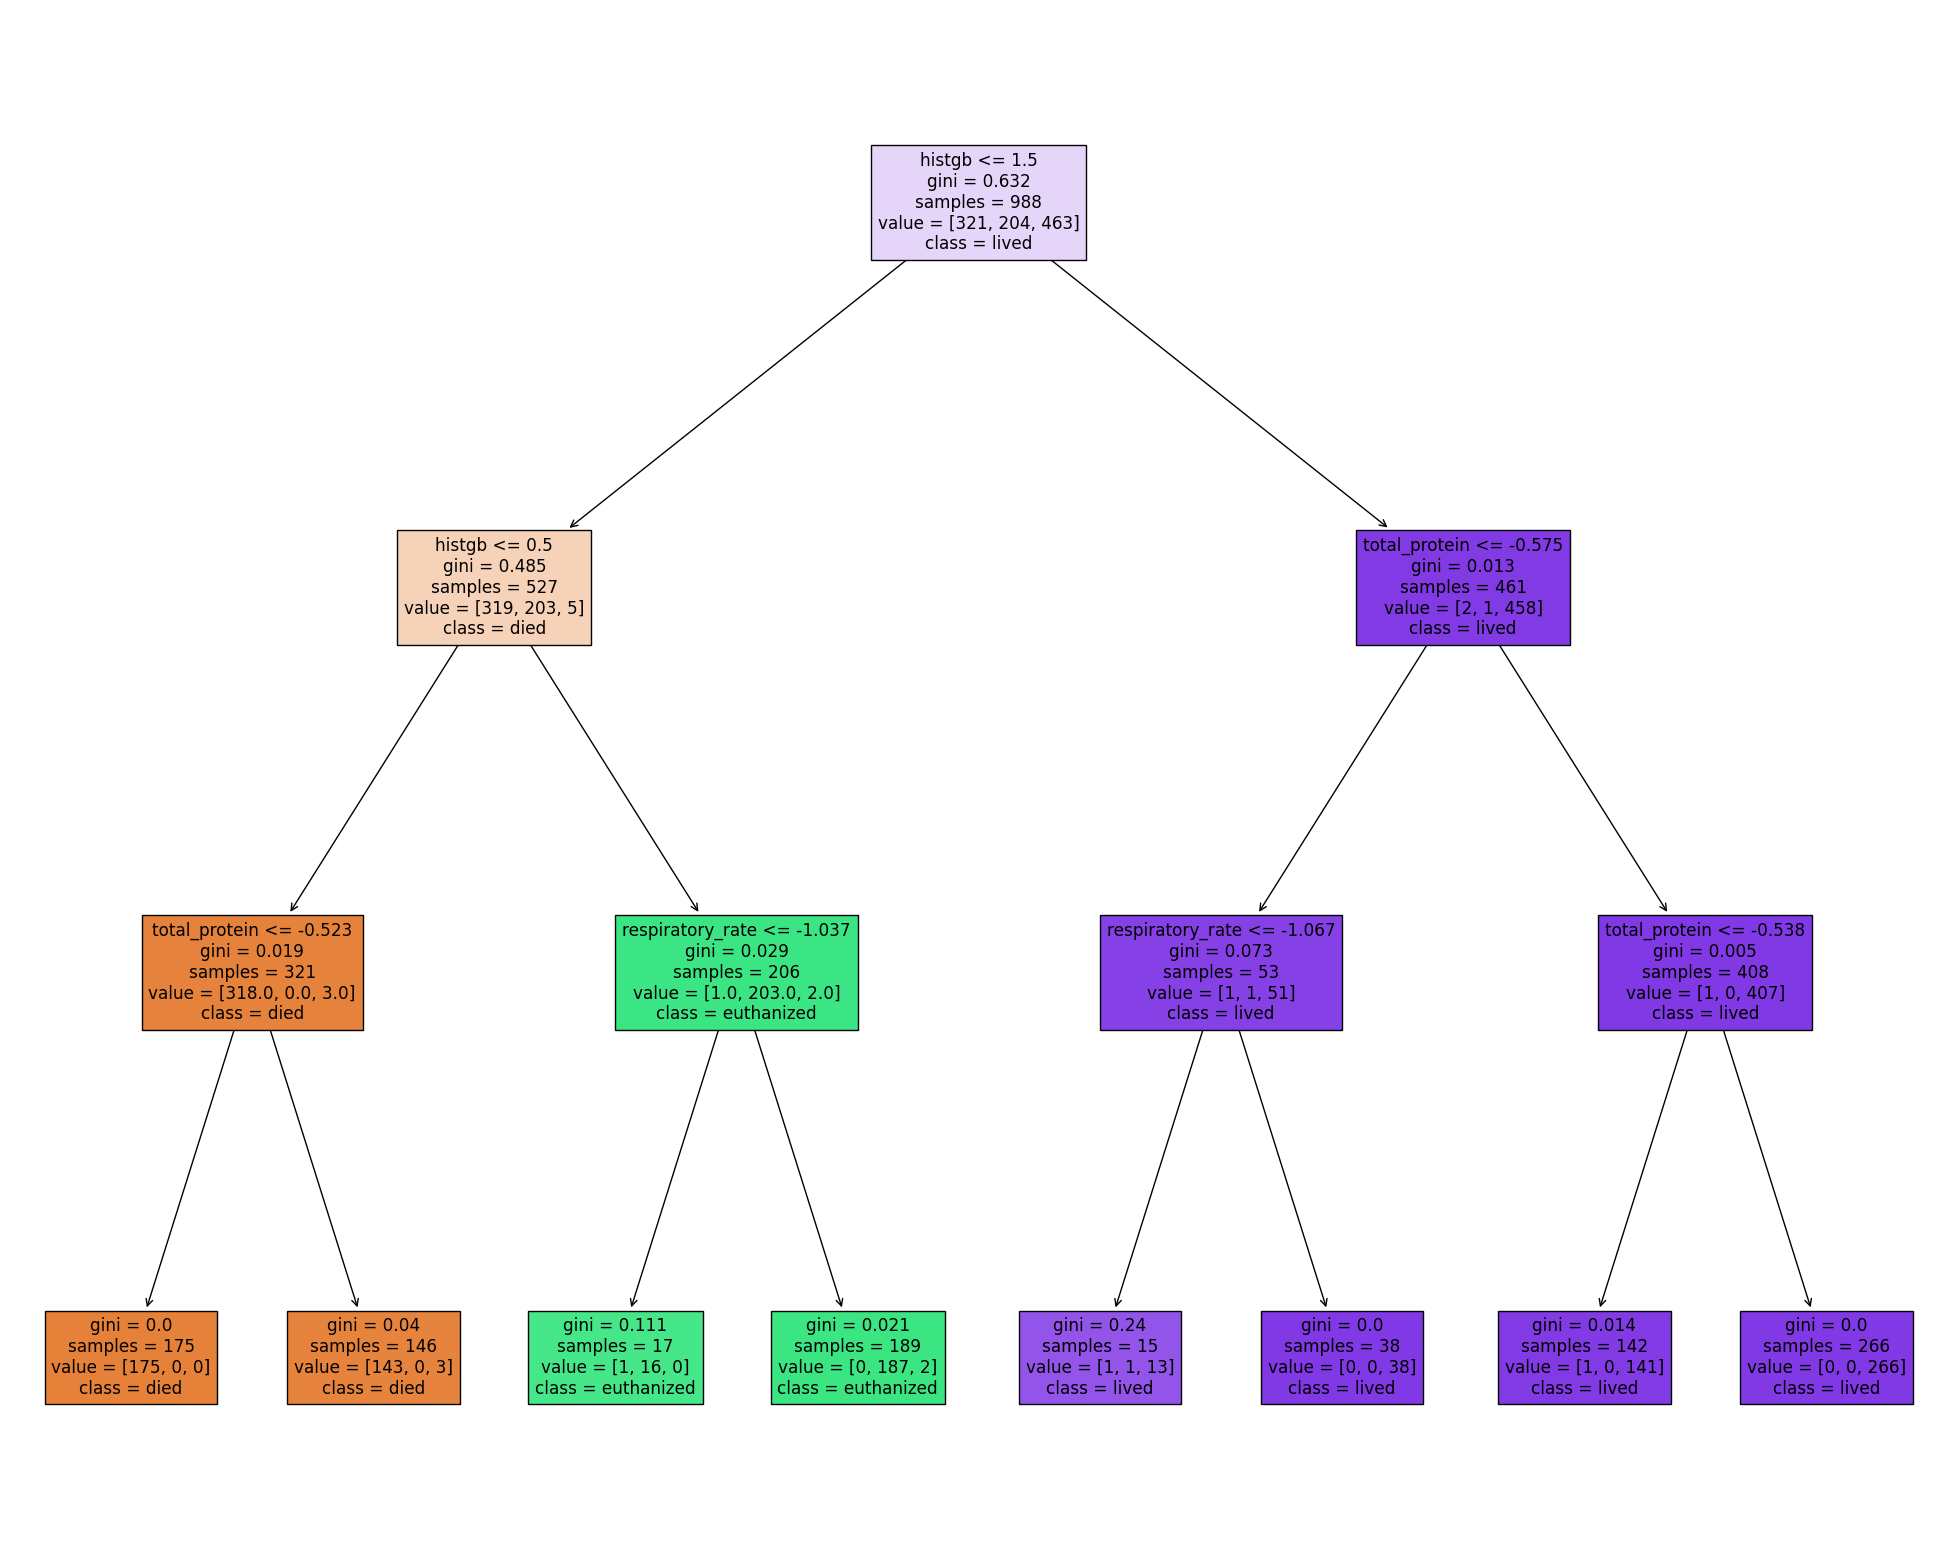

In [49]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_classifier, 
                   feature_names=list(train_preds_df.columns),  
                   class_names=['died', 'euthanized', 'lived'],
                   filled=True)

In [50]:
test_preds = final_classifier.predict(X_test_with_preds)

In [51]:
PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

In [52]:
submission_df.to_csv("submissions/With_Ordinal_Encoding/Pos_and_Neg/DecisionTree_Ensemble_6_RandomForest_5_7_NearestCentroid_NaiveBayes_XGBoost_LGBM_HistGB_Submission.csv", index=False)